# Telecom Customer Churn Prediction

About Dataset

Context:

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

Content:

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [595]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [499]:
df.drop(['customerID',],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [500]:
df.shape

(7043, 20)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Observation- Total charges column has string data type, we need to convert it to numeric

In [502]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [503]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [504]:
df.isnull().sum()* 100 / len(df) #% null values in columns

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [505]:
df.dropna(inplace=True)    # very few null values in TotalCharges columns, lets drop these

In [506]:
df_categorical = df.select_dtypes(include='object')  #Method  to get numeric & categorical columns...
df_numerical = df.select_dtypes(exclude='object')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [508]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


(-1.2008646042883513,
 1.186324296481086,
 -1.1906305707199358,
 1.2343443284603395)

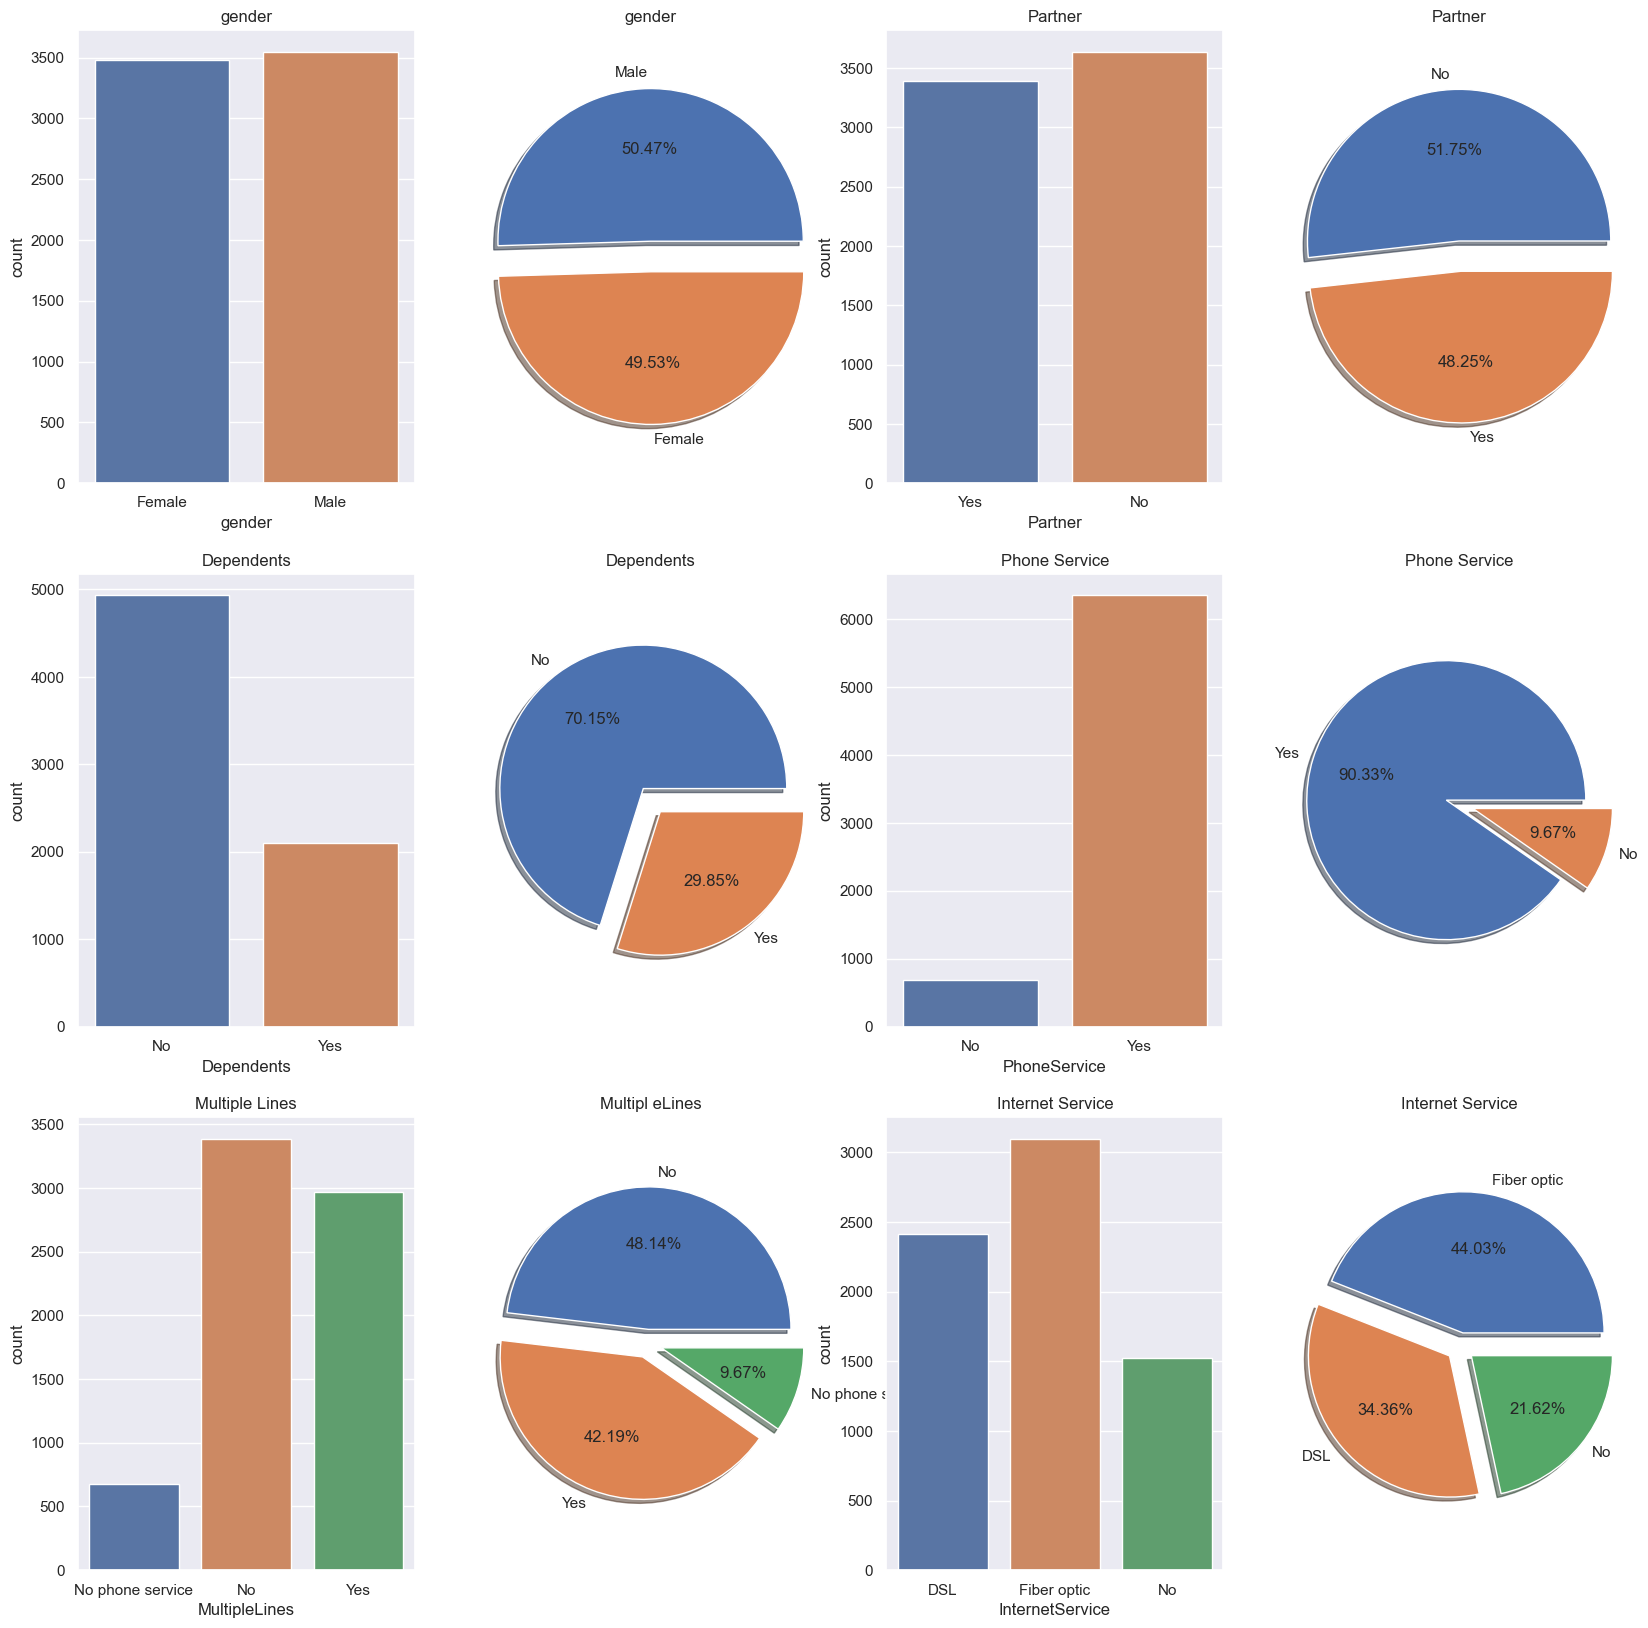

In [509]:
#Lets visualize the categorical columns:

plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.gender)
plt.title('gender') 
plt.subplot(3,4,2)
gender = df.gender.value_counts()
plt.pie(gender,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=gender.index)
plt.title('gender')
plt.axis('equal')


plt.subplot(3,4,3)
sns.countplot(df.Partner)
plt.title('Partner') 
plt.subplot(3,4,4)
Partner = df.Partner.value_counts()
plt.pie(Partner,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Partner.index)
plt.title('Partner')
plt.axis('equal')

plt.subplot(3,4,5)
sns.countplot(df.Dependents)
plt.title('Dependents') 
plt.subplot(3,4,6)
Dependents = df.Dependents.value_counts()
plt.pie(Dependents,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Dependents.index)
plt.title('Dependents')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.PhoneService)
plt.title('Phone Service') 
plt.subplot(3,4,8)
PhoneService = df.PhoneService.value_counts()
plt.pie(PhoneService,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=PhoneService.index)
plt.title('Phone Service')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df.MultipleLines)
plt.title('Multiple Lines') 
plt.subplot(3,4,10)
MultipleLines = df.MultipleLines.value_counts()
plt.pie(MultipleLines,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=MultipleLines.index)
plt.title('Multipl eLines')
plt.axis('equal')

plt.subplot(3,4,11)
sns.countplot(df.InternetService)
plt.title('Internet Service') 
plt.subplot(3,4,12)
InternetService = df.InternetService.value_counts()
plt.pie(InternetService,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=InternetService.index)
plt.title('Internet Service')
plt.axis('equal')


(-1.1974914328279502, 1.1861636692686859, -1.1840416947479542, 1.2208542622734)

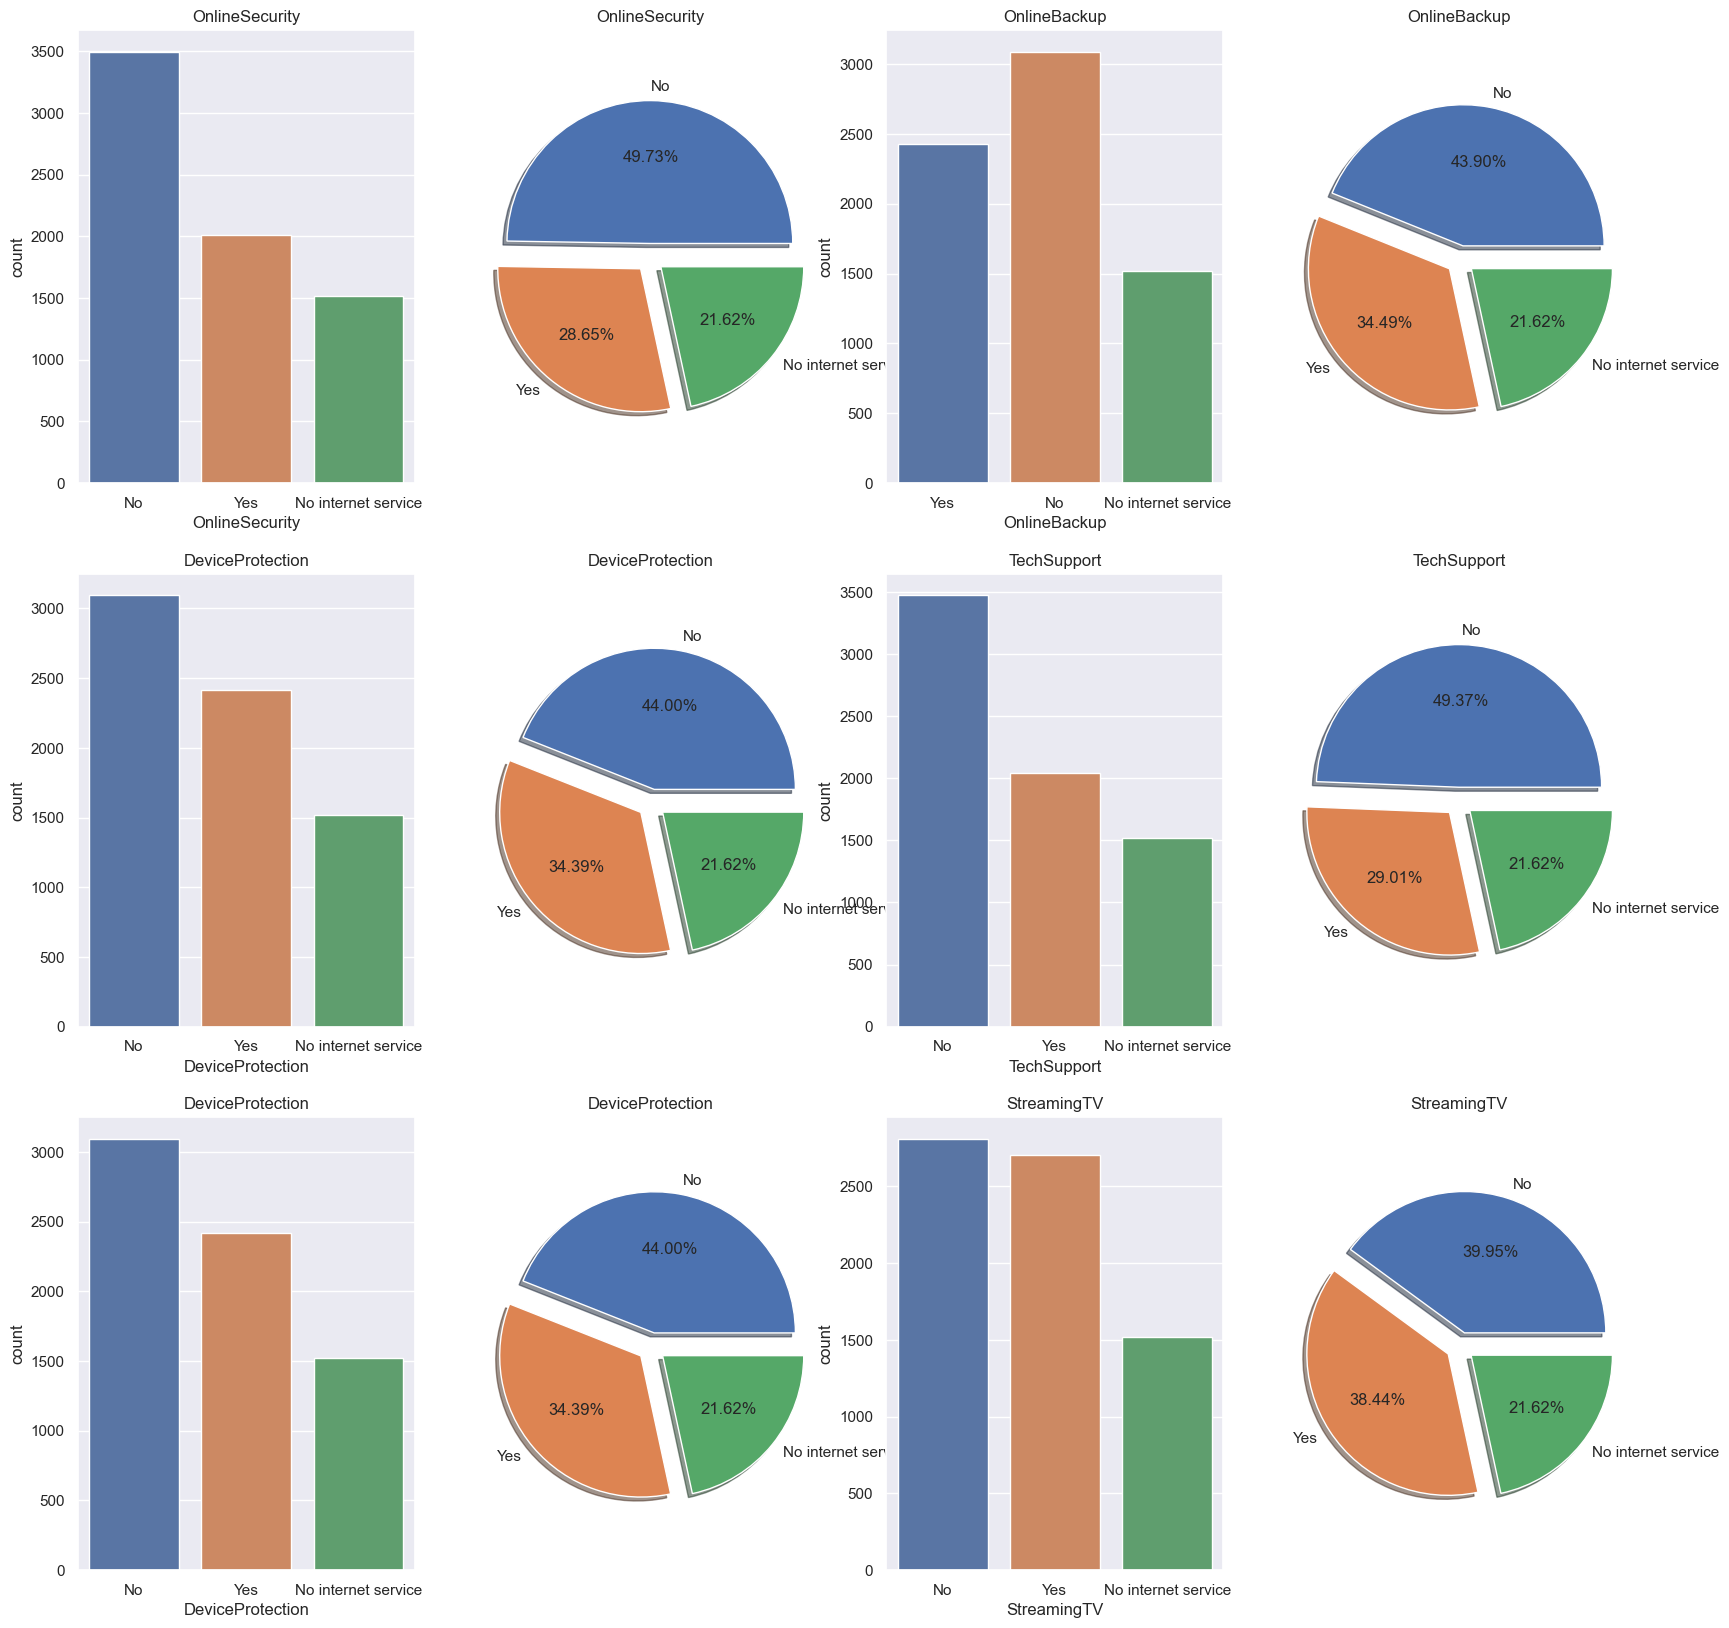

In [510]:
#Lets visualize the categorical columns:

plt.figure(figsize=(20,20))

plt.subplot(3,4,1)
sns.countplot(df.OnlineSecurity)
plt.title('OnlineSecurity') 
plt.subplot(3,4,2)
OnlineSecurity = df.OnlineSecurity.value_counts()
plt.pie(OnlineSecurity,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=OnlineSecurity.index)
plt.title('OnlineSecurity')
plt.axis('equal')


plt.subplot(3,4,3)
sns.countplot(df.OnlineBackup)
plt.title('OnlineBackup') 
plt.subplot(3,4,4)
OnlineBackup = df.OnlineBackup.value_counts()
plt.pie(OnlineBackup,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=OnlineBackup.index)
plt.title('OnlineBackup')
plt.axis('equal')

plt.subplot(3,4,5)
sns.countplot(df.DeviceProtection)
plt.title('DeviceProtection') 
plt.subplot(3,4,6)
DeviceProtection = df.DeviceProtection.value_counts()
plt.pie(DeviceProtection,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=DeviceProtection.index)
plt.title('DeviceProtection')
plt.axis('equal')

plt.subplot(3,4,7)
sns.countplot(df.TechSupport)
plt.title('TechSupport') 
plt.subplot(3,4,8)
TechSupport = df.TechSupport.value_counts()
plt.pie(TechSupport,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=TechSupport.index)
plt.title('TechSupport')
plt.axis('equal')

plt.subplot(3,4,9)
sns.countplot(df.DeviceProtection)
plt.title('DeviceProtection') 
plt.subplot(3,4,10)
DeviceProtection = df.DeviceProtection.value_counts()
plt.pie(DeviceProtection,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=DeviceProtection.index)
plt.title('DeviceProtection')
plt.axis('equal')


plt.subplot(3,4,11)
sns.countplot(df.StreamingTV)
plt.title('StreamingTV') 
plt.subplot(3,4,12)
StreamingTV = df.StreamingTV.value_counts()
plt.pie(StreamingTV,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=StreamingTV.index)
plt.title('StreamingTV')
plt.axis('equal')



(-1.2309491709417708,
 1.1877275208480973,
 -1.225464910714198,
 1.199695790028436)

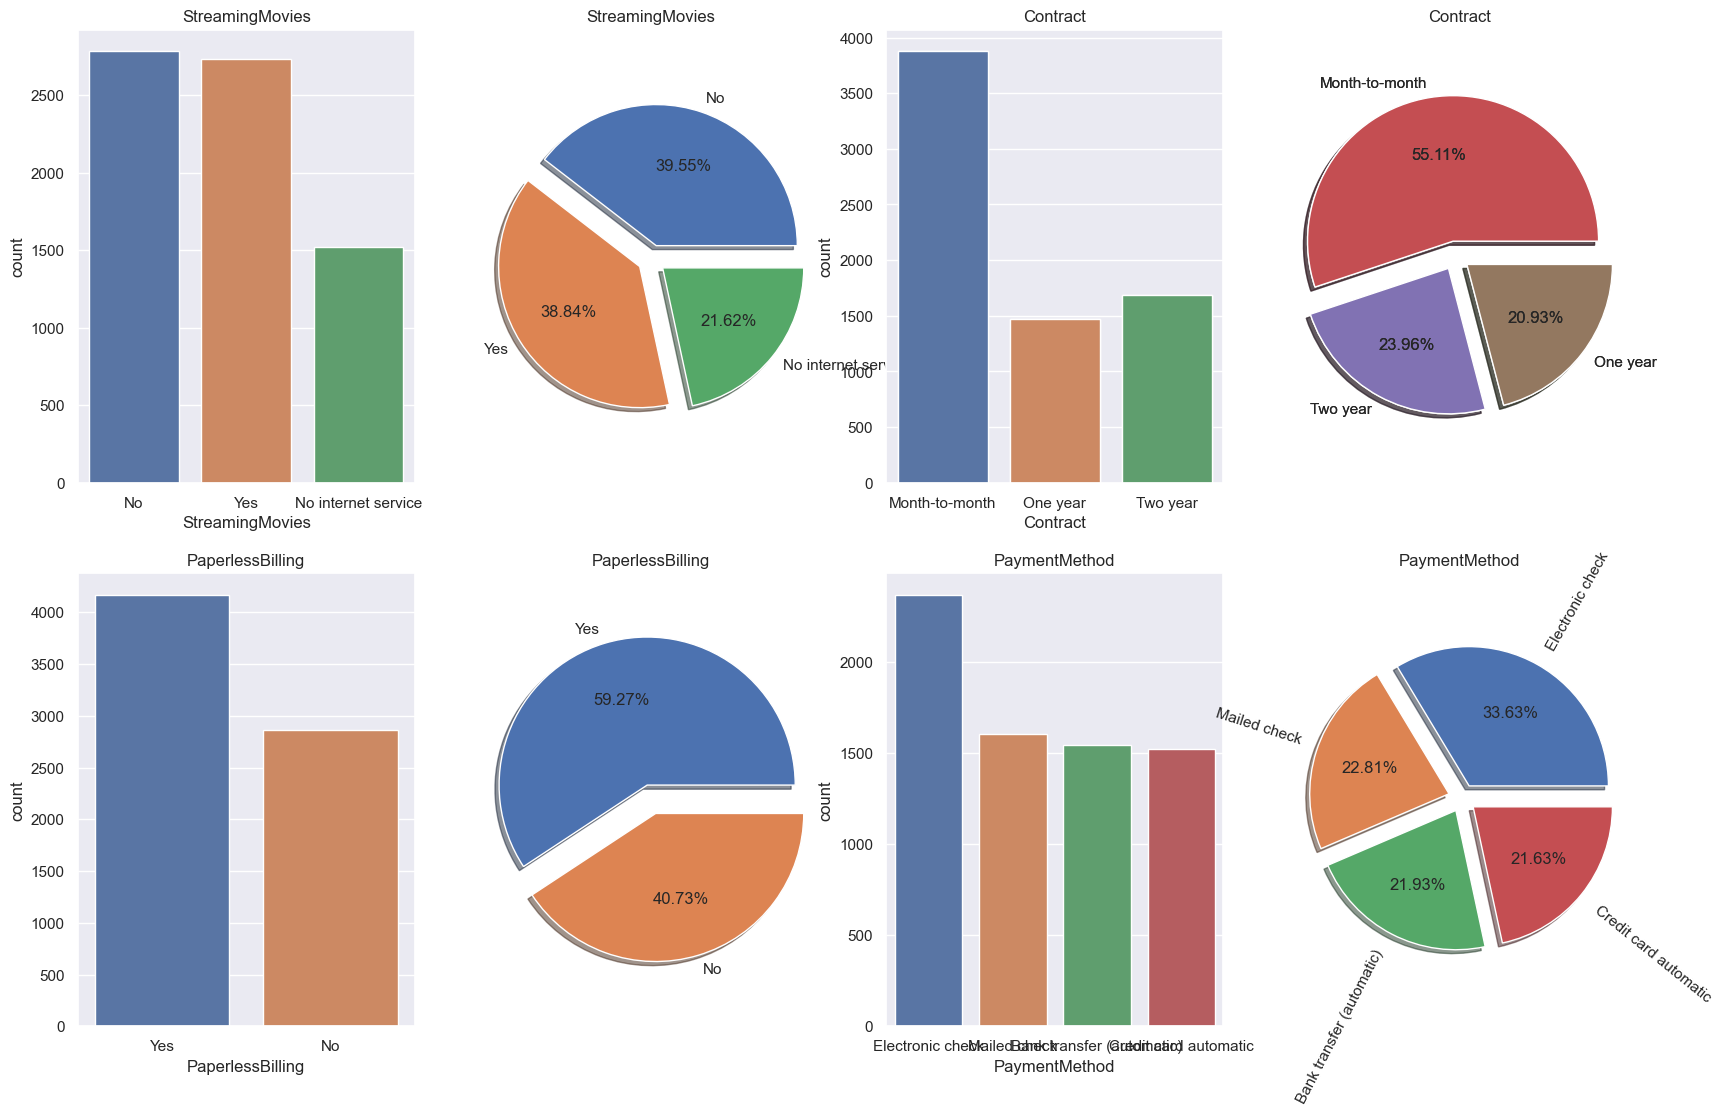

In [511]:
plt.figure(figsize=(20,20))
plt.subplot(3,4,1)
sns.countplot(df.StreamingMovies)
plt.title('StreamingMovies') 
plt.subplot(3,4,2)
StreamingMovies = df.StreamingMovies.value_counts()
plt.pie(StreamingMovies,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=StreamingMovies.index)
plt.title('StreamingMovies')
plt.axis('equal')


plt.subplot(3,4,3)
sns.countplot(df.Contract)
plt.title('Contract') 
plt.subplot(3,4,4)
Contract = df.Contract.value_counts()
plt.pie(Contract,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Contract.index)
plt.title('Contract')
plt.axis('equal')


plt.subplot(3,4,3)
sns.countplot(df.Contract)
plt.title('Contract') 
plt.subplot(3,4,4)
Contract = df.Contract.value_counts()
plt.pie(Contract,explode=[0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=Contract.index)
plt.title('Contract')
plt.axis('equal')


plt.subplot(3,4,5)
sns.countplot(df.PaperlessBilling)
plt.title('PaperlessBilling') 
plt.subplot(3,4,6)
PaperlessBilling = df.PaperlessBilling.value_counts()
plt.pie(PaperlessBilling,explode=[0.1,0.1],autopct='%0.2f%%',shadow=True,labels=PaperlessBilling.index)
plt.title('PaperlessBilling')
plt.axis('equal')


plt.subplot(3,4,7)
sns.countplot(df.PaymentMethod)
plt.title('PaymentMethod') 
plt.subplot(3,4,8)
PaymentMethod = df.PaymentMethod.value_counts()
plt.pie(PaymentMethod,explode=[0.1,0.1,0.1,0.1],autopct='%0.2f%%',shadow=True,labels=PaymentMethod.index,rotatelabels=True)
plt.title('PaymentMethod')
plt.axis('equal')



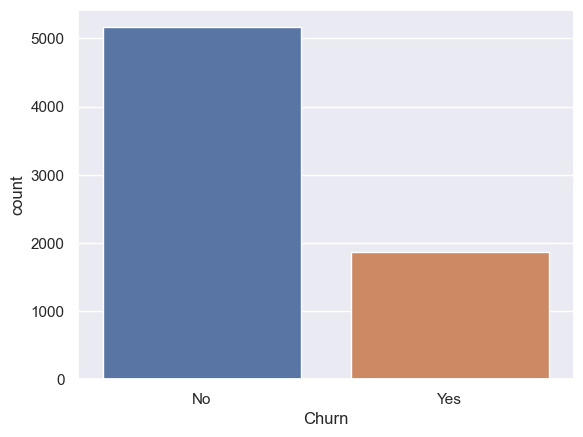

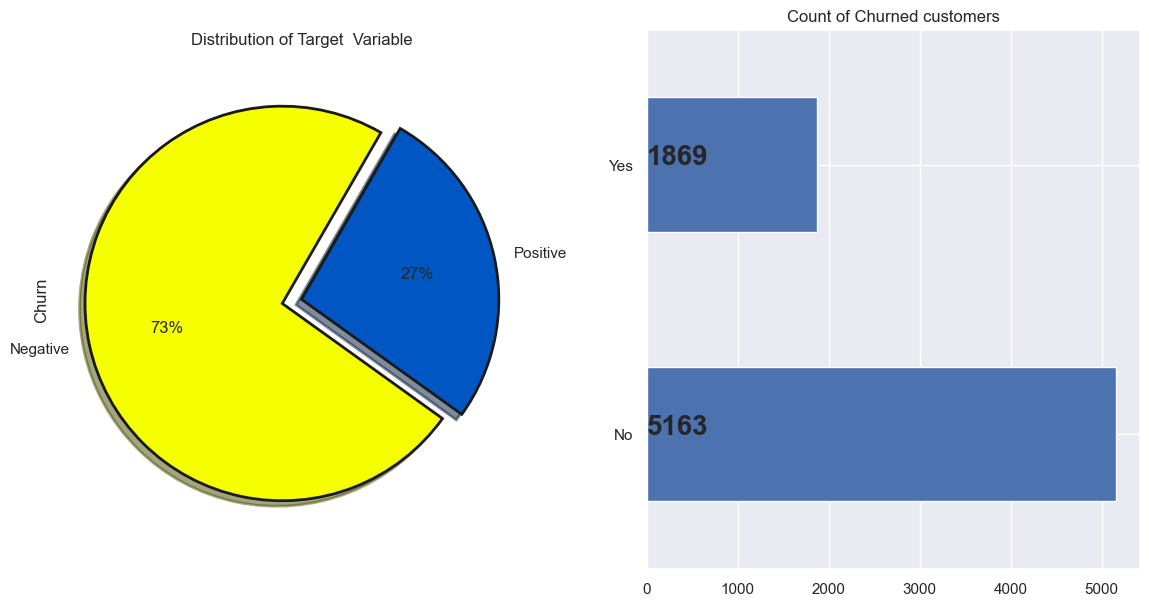

In [512]:
#Distribution of Target Variable
sns.countplot(df['Churn'],data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)

df["Churn"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Negative","Positive"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["Churn"].value_counts().plot(kind="barh")

for i,j in enumerate(df["Churn"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Churned customers")
plt.show()

**This is imbalanced dataset, no. of churned customers are only 27%**

In [513]:
df_categorical.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

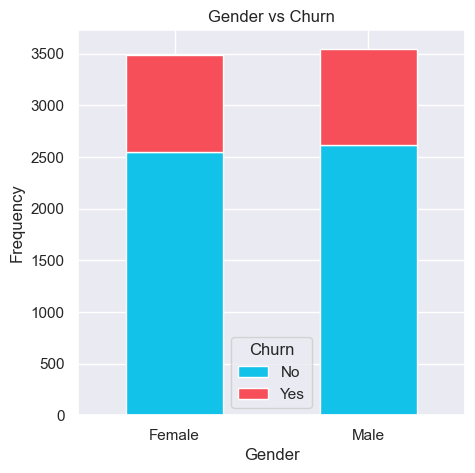

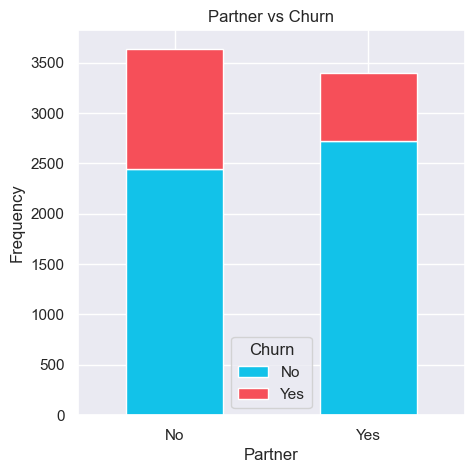

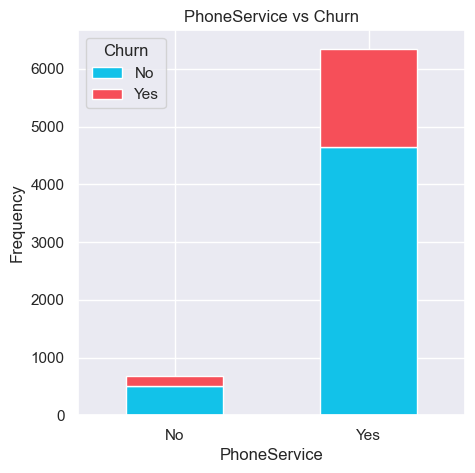

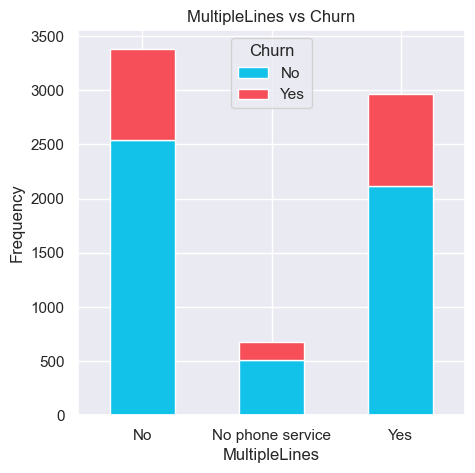

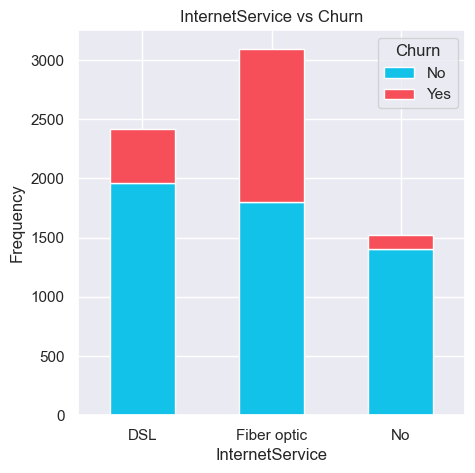

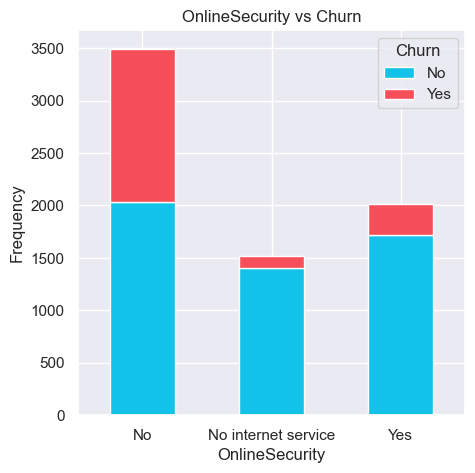

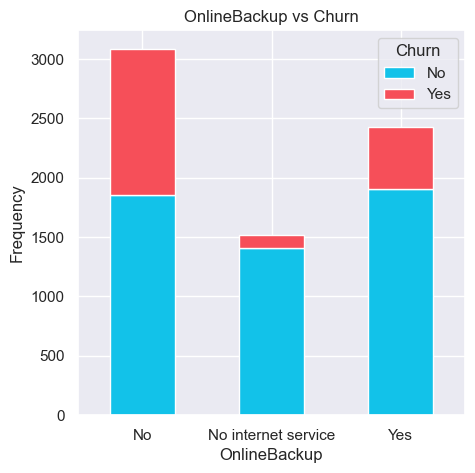

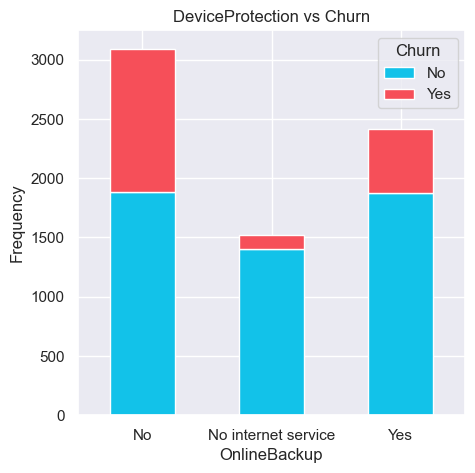

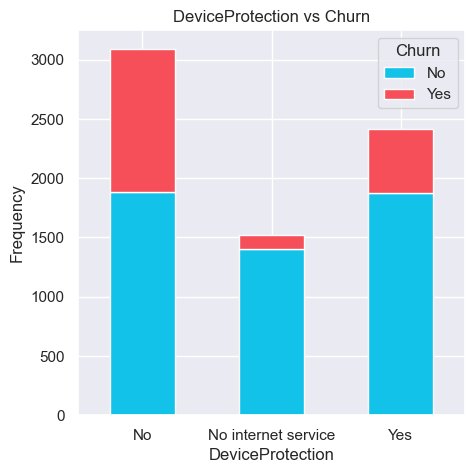

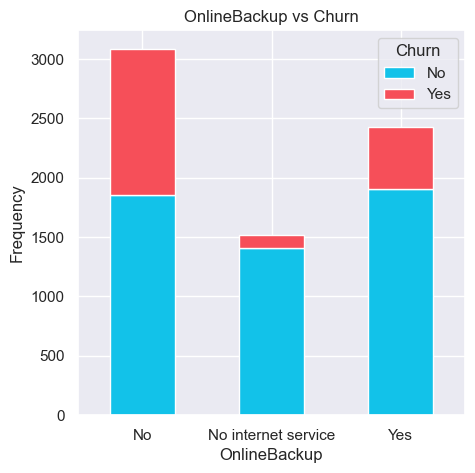

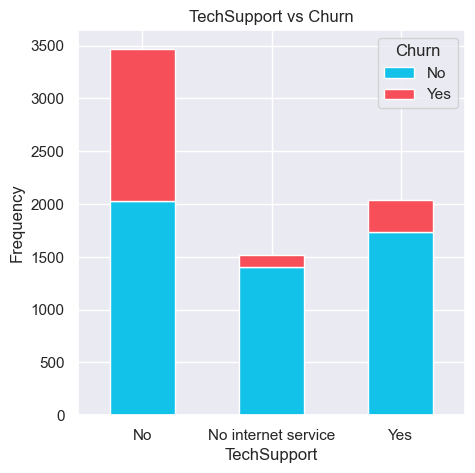

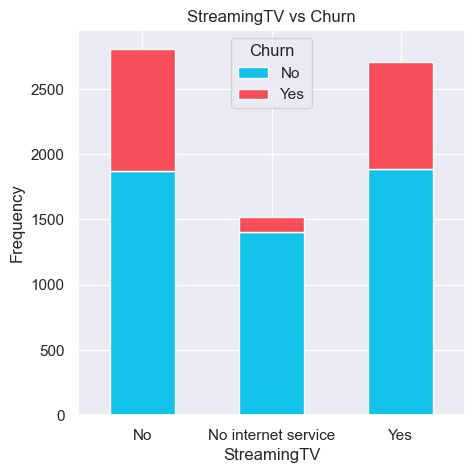

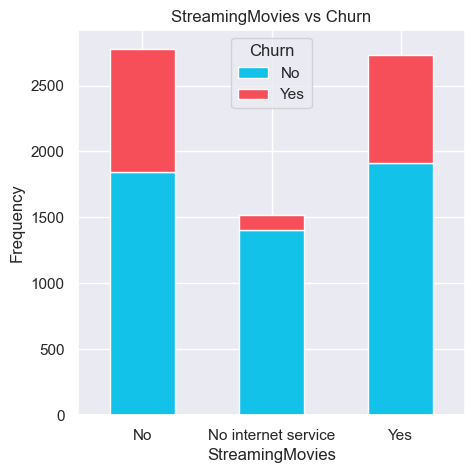

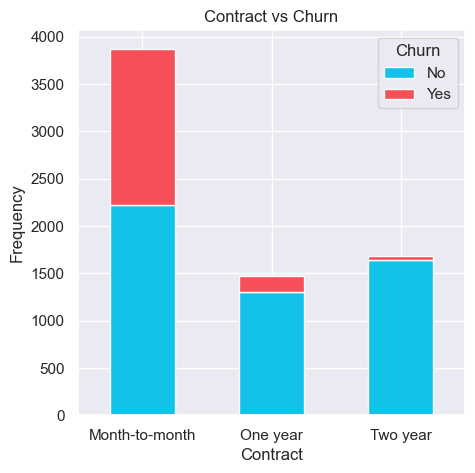

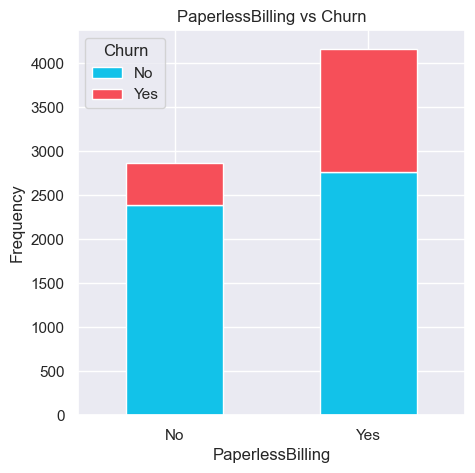

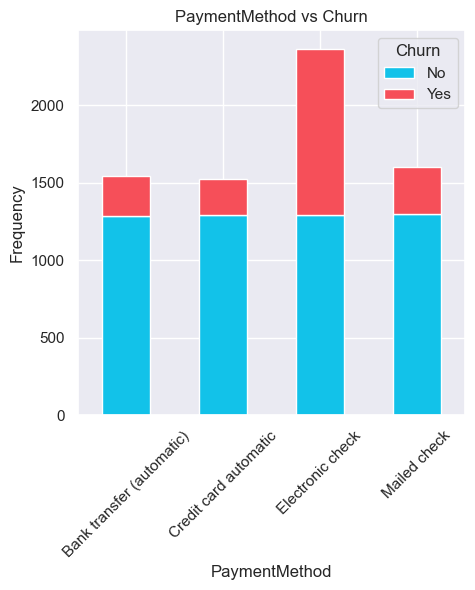

In [514]:
pd.crosstab(df.gender,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.Partner,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('Partner vs Churn')
plt.xlabel('Partner')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.PhoneService,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.MultipleLines,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.InternetService,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('InternetService vs Churn')
plt.xlabel('InternetService')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.OnlineSecurity,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('OnlineSecurity vs Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.OnlineBackup,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('OnlineBackup vs Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.DeviceProtection,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('DeviceProtection vs Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.DeviceProtection,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('DeviceProtection vs Churn')
plt.xlabel('DeviceProtection')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.OnlineBackup,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('OnlineBackup vs Churn')
plt.xlabel('OnlineBackup')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.TechSupport,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('TechSupport vs Churn')
plt.xlabel('TechSupport')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

pd.crosstab(df.StreamingTV,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('StreamingTV vs Churn')
plt.xlabel('StreamingTV')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.StreamingMovies,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('StreamingMovies vs Churn')
plt.xlabel('StreamingMovies')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.Contract,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('PaperlessBilling vs Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


pd.crosstab(df.PaymentMethod,df.Churn).plot(kind="bar", stacked=True, figsize=(5,5),color=['#12c2e9','#f64f59'])
plt.title('PaymentMethod vs Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()






In [515]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

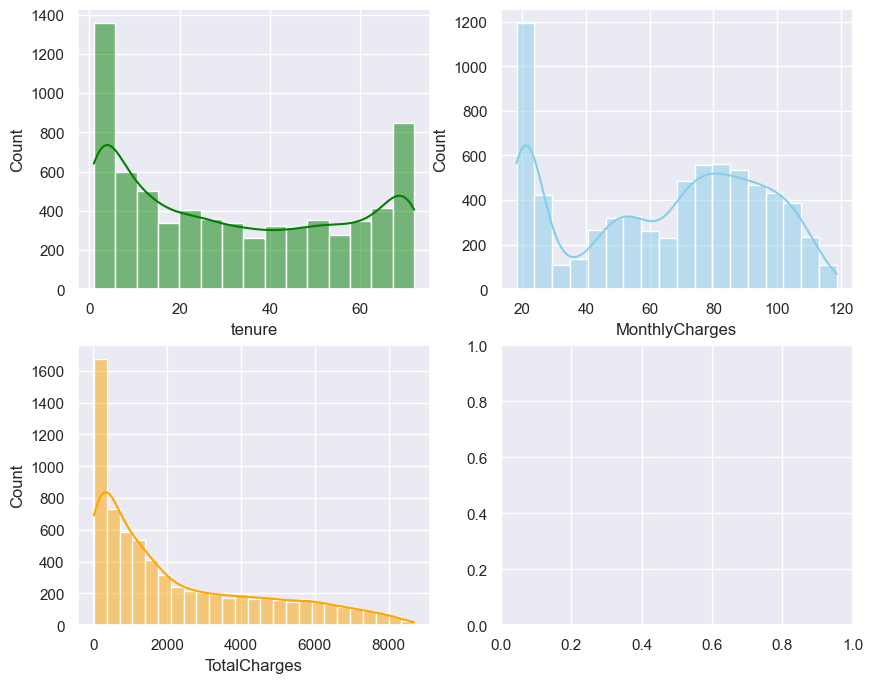

In [516]:
#Numerical columns:

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="tenure", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="MonthlyCharges", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="TotalCharges", kde=True, ax=axs[1, 0], color='orange')

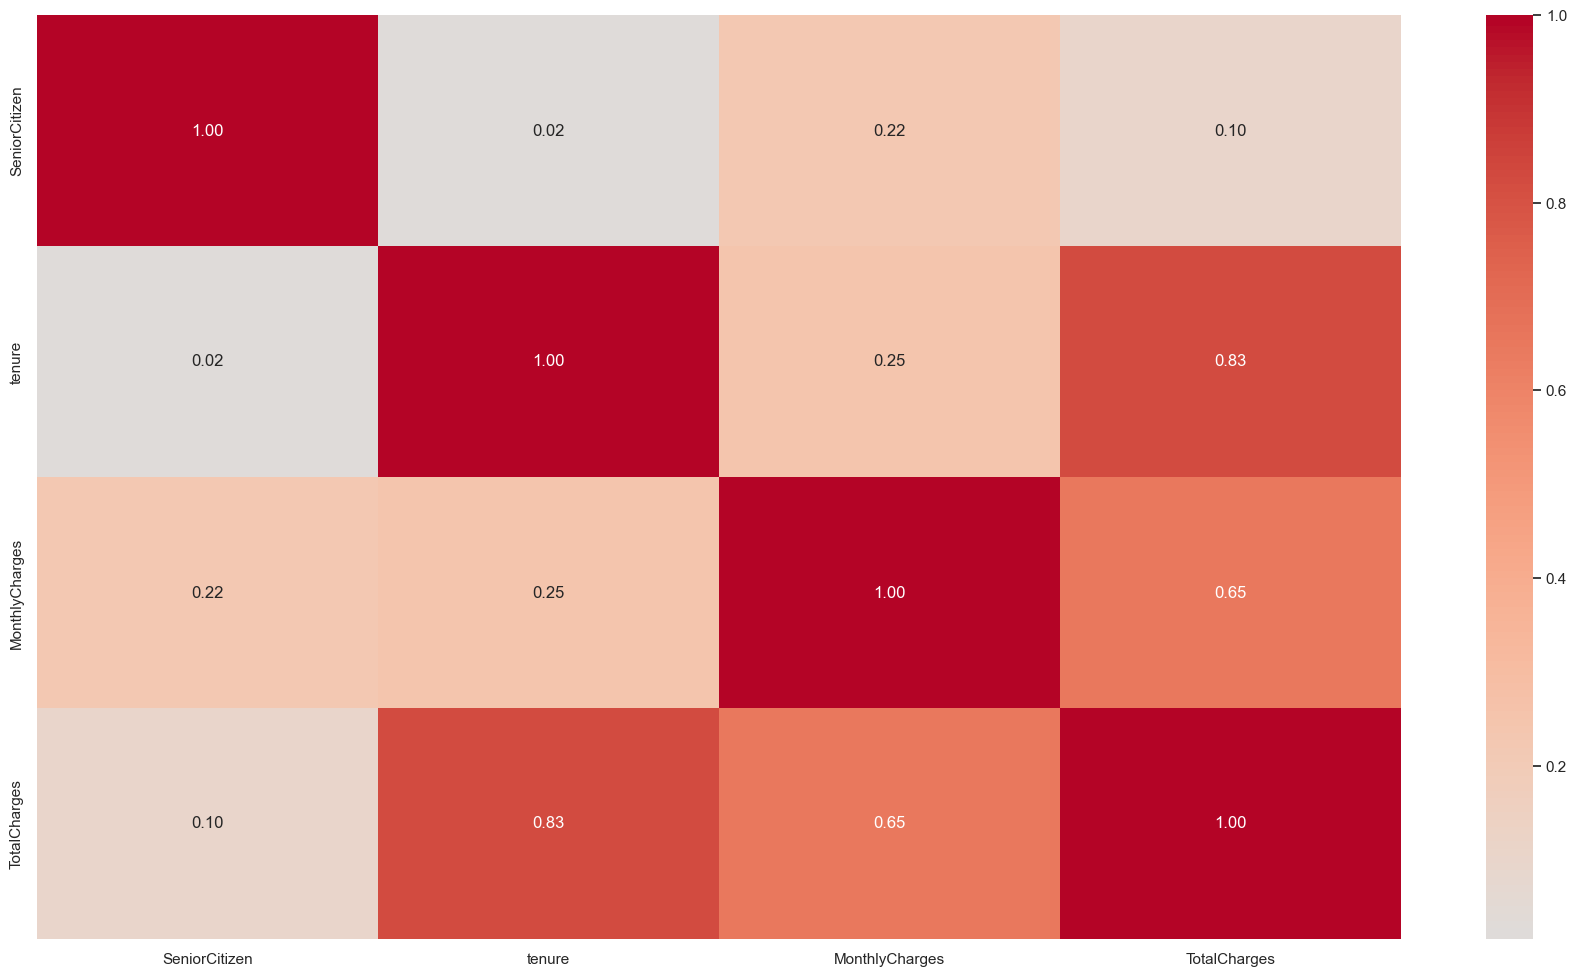

In [517]:
matrix = df.corr()
#mask = np.triu(np.ones_like(matrix,dtype='bool'))

plt.figure(figsize=(22,12))
sns.heatmap(matrix,annot=True,center=0,fmt='.2f',cmap="coolwarm")
plt.show()

In [518]:
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


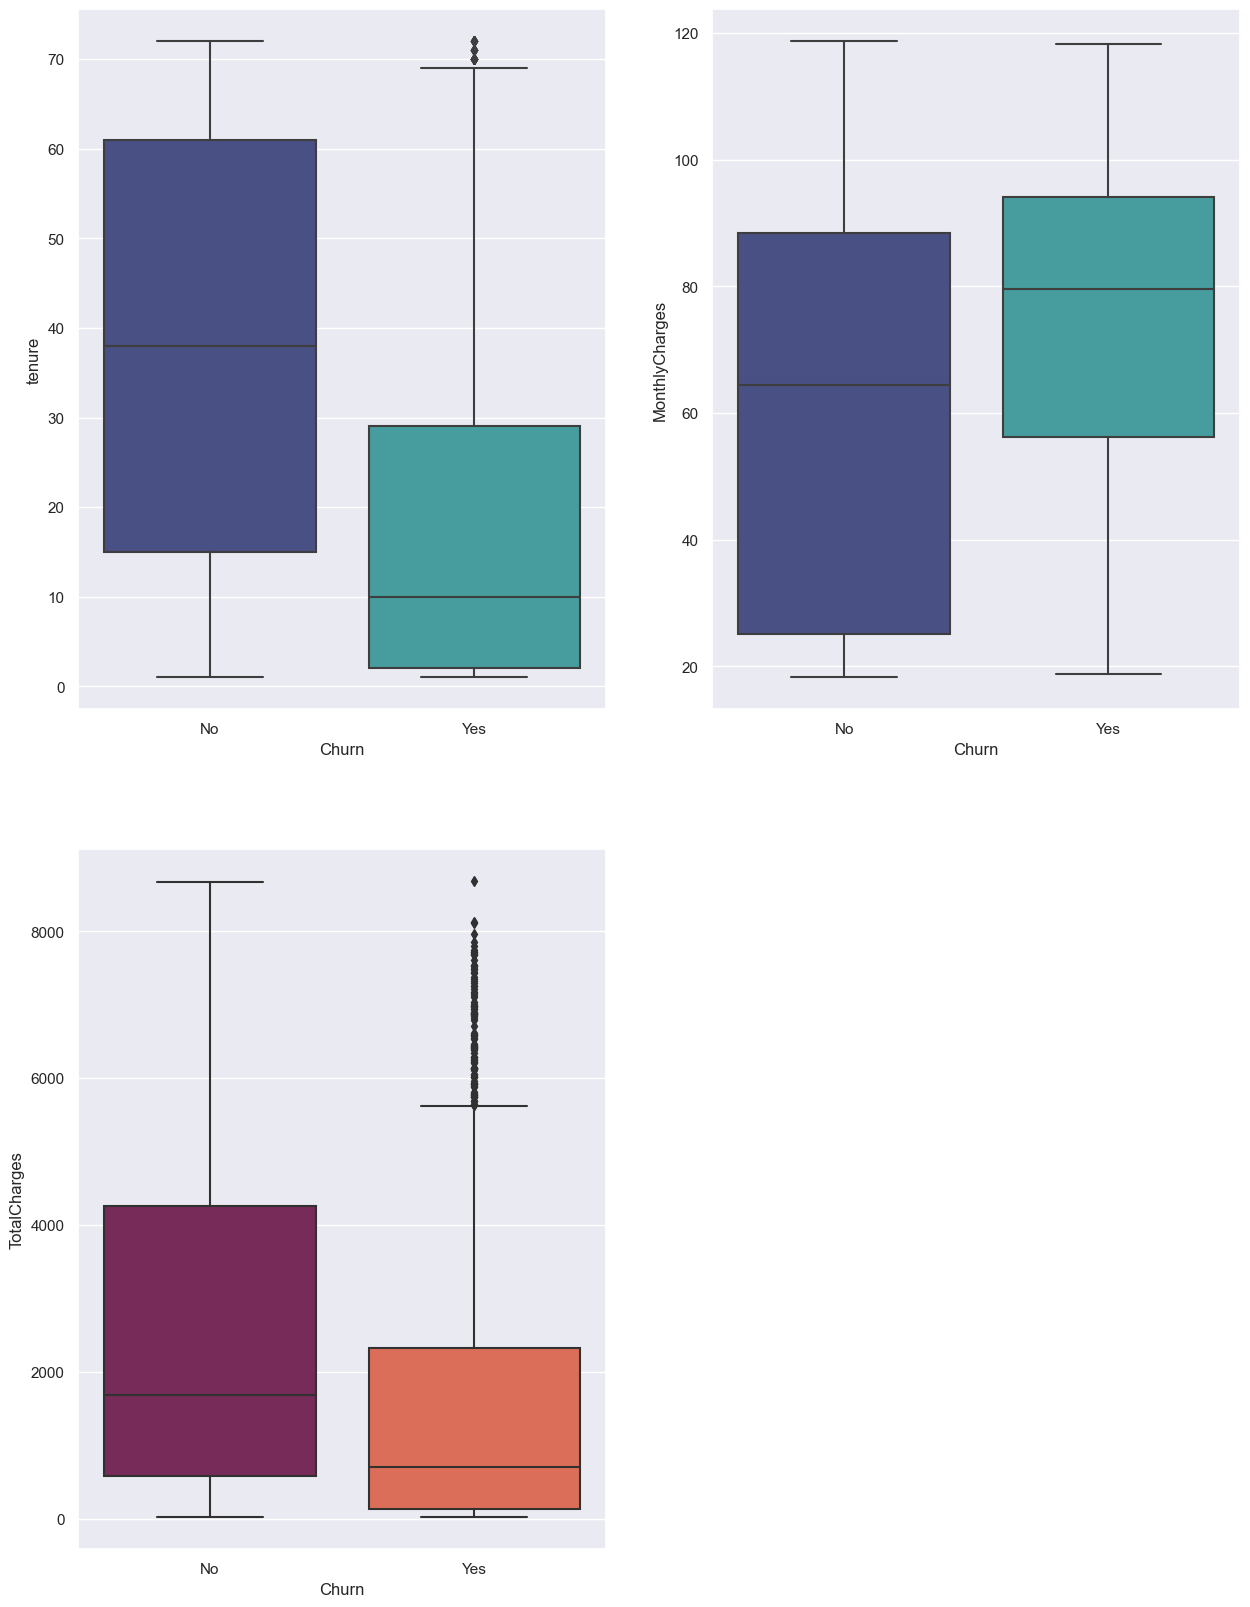

In [519]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.boxplot(x="Churn", y="tenure", data=df, palette="mako");


plt.subplot(2,2,2)
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="mako");

plt.subplot(2,2,3)
sns.boxplot(x="Churn", y="TotalCharges", data=df, palette="rocket");


**Observations- There are outliers present in the dataset, we'll go ahead with original dataset for now, later we'll try to remove these outliers to fine-tune the model**

### One hot encoding for Categorical columns

In [520]:
df_categorical = df.select_dtypes(include='object')
for column in df_categorical:
    print(f'{column}: {df_categorical[column].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card automatic']
Churn: ['No' 'Yes']


In [521]:
df.gender.replace(('Male', 'Female'), (1, 0), inplace=True) 
df.Partner.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.Dependents.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.MultipleLines.replace(('Yes', 'No','No phone service'), (1, 0, 0), inplace=True) 
df.OnlineSecurity.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.OnlineBackup.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.DeviceProtection.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.TechSupport.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.StreamingTV.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.StreamingMovies.replace(('Yes', 'No','No internet service'), (1, 0, 0), inplace=True) 
df.Contract.replace(('Month-to-month', 'One year','Two year'), (0, 1, 2), inplace=True) 
df.PaperlessBilling.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.PhoneService.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True) 


In [522]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('Electronic check', 'Electronic_check')
df['PaymentMethod'] = df['PaymentMethod'].str.replace('Mailed check', 'Mailed_check')
df['PaymentMethod'] = df['PaymentMethod'].str.replace('Credit card automatic', 'Credit_card_automatic')
df['InternetService'] = df['InternetService'].str.replace('Fiber optic', 'Fiber_optic')

In [523]:
df = pd.get_dummies(data=df, columns=['InternetService','PaymentMethod'],drop_first=True)

In [524]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber_optic,InternetService_No,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,1,0,0,1,0


In [525]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber_optic', 'InternetService_No',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')

In [526]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [527]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber_optic,InternetService_No,PaymentMethod_Credit_card_automatic,PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,53.85,108.15,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,42.30,1840.75,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [528]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [529]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [530]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [531]:
X_train.shape

(5274, 22)

In [532]:
y_train.value_counts()

0    3857
1    1417
Name: Churn, dtype: int64

### As the dataset is imbalaced, we shall use SMOTE to balance the target column(only on the traninig set)

In [533]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [534]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [535]:
y_train.value_counts()

0    3857
1    3857
Name: Churn, dtype: int64

In [536]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [537]:
y_train.value_counts()

0    3857
1    3857
Name: Churn, dtype: int64

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

ModelLR = LogisticRegression()
ModelRF = RandomForestClassifier(n_estimators=100)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelLGB = lgb.LGBMClassifier()
ModelXGB = XGBClassifier()
ModelADA = AdaBoostClassifier()
ModelCatBoost = CatBoostClassifier()

In [539]:
MM = [ModelLR, ModelRF,ModelKNN,ModelLGB,ModelXGB,ModelADA,ModelCatBoost]
score_test_list = []
score_train_list = []
recall_list = [] 
precision_list = []
f1Score_list = []
accuracy_list = []

for models in MM:
    models.fit(X_train, y_train)
    score_train = models.score(X_train,y_train)
    score_test = models.score(X_test,y_test)

     
    
    # Prediction
    
    y_pred = models.predict(X_test)
    y_pred_prob = models.predict_proba(X_test)
    
    
     # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred
    
    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)

    
    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)


    # classification report for precision, recall f1-score and accuracy


    # calculating the metrics

    recall = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    f1Score_list.append(f1Score)
    
    score_test_list.append(score_test)
    score_train_list.append(score_train)
    


Learning rate set to 0.024649
0:	learn: 0.6799643	total: 5.34ms	remaining: 5.33s
1:	learn: 0.6666224	total: 11.9ms	remaining: 5.95s
2:	learn: 0.6541069	total: 17ms	remaining: 5.67s
3:	learn: 0.6420727	total: 22.1ms	remaining: 5.51s
4:	learn: 0.6300556	total: 27.1ms	remaining: 5.39s
5:	learn: 0.6187730	total: 31.4ms	remaining: 5.2s
6:	learn: 0.6083325	total: 35.5ms	remaining: 5.04s
7:	learn: 0.5985779	total: 39.6ms	remaining: 4.92s
8:	learn: 0.5898804	total: 44.4ms	remaining: 4.89s
9:	learn: 0.5829625	total: 48.1ms	remaining: 4.76s
10:	learn: 0.5743029	total: 52.4ms	remaining: 4.71s
11:	learn: 0.5667998	total: 57.4ms	remaining: 4.72s
12:	learn: 0.5592087	total: 63.9ms	remaining: 4.85s
13:	learn: 0.5518272	total: 67.7ms	remaining: 4.76s
14:	learn: 0.5448259	total: 70.9ms	remaining: 4.65s
15:	learn: 0.5383091	total: 74.2ms	remaining: 4.56s
16:	learn: 0.5324943	total: 77.4ms	remaining: 4.48s
17:	learn: 0.5268499	total: 81.2ms	remaining: 4.43s
18:	learn: 0.5222823	total: 84.5ms	remaining: 4

172:	learn: 0.3638647	total: 661ms	remaining: 3.16s
173:	learn: 0.3636778	total: 664ms	remaining: 3.15s
174:	learn: 0.3634392	total: 667ms	remaining: 3.15s
175:	learn: 0.3632478	total: 671ms	remaining: 3.14s
176:	learn: 0.3630184	total: 675ms	remaining: 3.14s
177:	learn: 0.3626776	total: 679ms	remaining: 3.13s
178:	learn: 0.3624203	total: 682ms	remaining: 3.13s
179:	learn: 0.3621234	total: 687ms	remaining: 3.13s
180:	learn: 0.3618209	total: 690ms	remaining: 3.12s
181:	learn: 0.3615402	total: 694ms	remaining: 3.12s
182:	learn: 0.3612869	total: 697ms	remaining: 3.11s
183:	learn: 0.3609756	total: 700ms	remaining: 3.11s
184:	learn: 0.3607345	total: 704ms	remaining: 3.1s
185:	learn: 0.3604672	total: 708ms	remaining: 3.1s
186:	learn: 0.3601797	total: 711ms	remaining: 3.09s
187:	learn: 0.3599318	total: 715ms	remaining: 3.09s
188:	learn: 0.3596367	total: 718ms	remaining: 3.08s
189:	learn: 0.3593857	total: 727ms	remaining: 3.1s
190:	learn: 0.3590976	total: 730ms	remaining: 3.09s
191:	learn: 0.3

345:	learn: 0.3281748	total: 1.33s	remaining: 2.51s
346:	learn: 0.3279399	total: 1.33s	remaining: 2.51s
347:	learn: 0.3277683	total: 1.34s	remaining: 2.5s
348:	learn: 0.3276396	total: 1.34s	remaining: 2.5s
349:	learn: 0.3275350	total: 1.34s	remaining: 2.5s
350:	learn: 0.3274147	total: 1.35s	remaining: 2.49s
351:	learn: 0.3272809	total: 1.35s	remaining: 2.49s
352:	learn: 0.3271286	total: 1.35s	remaining: 2.48s
353:	learn: 0.3269558	total: 1.36s	remaining: 2.48s
354:	learn: 0.3266724	total: 1.36s	remaining: 2.48s
355:	learn: 0.3263954	total: 1.38s	remaining: 2.49s
356:	learn: 0.3262611	total: 1.38s	remaining: 2.49s
357:	learn: 0.3260834	total: 1.39s	remaining: 2.49s
358:	learn: 0.3258542	total: 1.4s	remaining: 2.5s
359:	learn: 0.3257129	total: 1.4s	remaining: 2.49s
360:	learn: 0.3254955	total: 1.41s	remaining: 2.49s
361:	learn: 0.3253297	total: 1.41s	remaining: 2.49s
362:	learn: 0.3251830	total: 1.42s	remaining: 2.49s
363:	learn: 0.3250017	total: 1.42s	remaining: 2.48s
364:	learn: 0.3248

526:	learn: 0.2980958	total: 2s	remaining: 1.8s
527:	learn: 0.2979295	total: 2.01s	remaining: 1.79s
528:	learn: 0.2977978	total: 2.01s	remaining: 1.79s
529:	learn: 0.2977112	total: 2.02s	remaining: 1.79s
530:	learn: 0.2975647	total: 2.02s	remaining: 1.78s
531:	learn: 0.2973987	total: 2.02s	remaining: 1.78s
532:	learn: 0.2972686	total: 2.03s	remaining: 1.77s
533:	learn: 0.2971602	total: 2.03s	remaining: 1.77s
534:	learn: 0.2970363	total: 2.03s	remaining: 1.77s
535:	learn: 0.2968423	total: 2.04s	remaining: 1.76s
536:	learn: 0.2966500	total: 2.04s	remaining: 1.76s
537:	learn: 0.2965433	total: 2.04s	remaining: 1.75s
538:	learn: 0.2964456	total: 2.05s	remaining: 1.75s
539:	learn: 0.2963254	total: 2.05s	remaining: 1.75s
540:	learn: 0.2961931	total: 2.05s	remaining: 1.74s
541:	learn: 0.2959737	total: 2.06s	remaining: 1.74s
542:	learn: 0.2958154	total: 2.06s	remaining: 1.73s
543:	learn: 0.2957117	total: 2.06s	remaining: 1.73s
544:	learn: 0.2955919	total: 2.07s	remaining: 1.73s
545:	learn: 0.29

717:	learn: 0.2743459	total: 2.67s	remaining: 1.05s
718:	learn: 0.2742511	total: 2.67s	remaining: 1.04s
719:	learn: 0.2741112	total: 2.68s	remaining: 1.04s
720:	learn: 0.2740132	total: 2.68s	remaining: 1.04s
721:	learn: 0.2739228	total: 2.69s	remaining: 1.03s
722:	learn: 0.2737880	total: 2.69s	remaining: 1.03s
723:	learn: 0.2736783	total: 2.7s	remaining: 1.03s
724:	learn: 0.2735737	total: 2.7s	remaining: 1.02s
725:	learn: 0.2734152	total: 2.71s	remaining: 1.02s
726:	learn: 0.2733153	total: 2.71s	remaining: 1.02s
727:	learn: 0.2732201	total: 2.72s	remaining: 1.01s
728:	learn: 0.2731397	total: 2.72s	remaining: 1.01s
729:	learn: 0.2730418	total: 2.73s	remaining: 1.01s
730:	learn: 0.2729618	total: 2.73s	remaining: 1s
731:	learn: 0.2728619	total: 2.74s	remaining: 1s
732:	learn: 0.2727140	total: 2.74s	remaining: 999ms
733:	learn: 0.2725905	total: 2.75s	remaining: 995ms
734:	learn: 0.2724615	total: 2.75s	remaining: 992ms
735:	learn: 0.2723304	total: 2.75s	remaining: 988ms
736:	learn: 0.272235

888:	learn: 0.2567544	total: 3.34s	remaining: 417ms
889:	learn: 0.2566723	total: 3.35s	remaining: 414ms
890:	learn: 0.2565634	total: 3.35s	remaining: 410ms
891:	learn: 0.2564432	total: 3.35s	remaining: 406ms
892:	learn: 0.2563081	total: 3.36s	remaining: 402ms
893:	learn: 0.2562467	total: 3.36s	remaining: 399ms
894:	learn: 0.2561477	total: 3.36s	remaining: 395ms
895:	learn: 0.2560627	total: 3.37s	remaining: 391ms
896:	learn: 0.2559931	total: 3.37s	remaining: 387ms
897:	learn: 0.2558612	total: 3.38s	remaining: 384ms
898:	learn: 0.2557241	total: 3.38s	remaining: 380ms
899:	learn: 0.2556517	total: 3.39s	remaining: 376ms
900:	learn: 0.2555649	total: 3.39s	remaining: 373ms
901:	learn: 0.2554871	total: 3.39s	remaining: 369ms
902:	learn: 0.2553957	total: 3.4s	remaining: 365ms
903:	learn: 0.2553075	total: 3.4s	remaining: 361ms
904:	learn: 0.2552006	total: 3.4s	remaining: 357ms
905:	learn: 0.2551000	total: 3.41s	remaining: 353ms
906:	learn: 0.2549845	total: 3.41s	remaining: 350ms
907:	learn: 0.2

In [540]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'KNeighbors Classifier','LGBM Classifier','XGBClassifier','ADABoost','CatBoostClassifier'
             ],
    
    'Score_train': [score_train_list[0], score_train_list[1],score_train_list[2] ,score_train_list[3] ,score_train_list[4],score_train_list[5],score_train_list[6]  
                   ],
    'Score_test': [score_test_list[0], score_test_list[1], score_test_list[2] , score_test_list[3] , score_test_list[4] , score_test_list[5], score_test_list[6]  
                   ],
    'Recall': [recall_list[0], recall_list[1], recall_list[2], recall_list[3], recall_list[4], recall_list[5], recall_list[6]
                   ],               

    'Precision': [precision_list[0], precision_list[1], precision_list[2], precision_list[3], precision_list[4], precision_list[5],precision_list[6]
                   ], 

    'F1 Score': [f1Score_list[0], f1Score_list[1], f1Score_list[2], f1Score_list[3], f1Score_list[4], f1Score_list[5],f1Score_list[6] 
                   ],

})


## For this kind of target variable, recall is the most important metric as we need to have least false negatives.

In [541]:
models.sort_values(by=['Recall', 'Score_test'], ascending=False) 

,Model,Score_train,Score_test,Recall,Precision,F1 Score
5,ADABoost,0.828623,0.763936,0.712,0.530,0.608
0,Logistic Regression,0.832772,0.781001,0.664,0.563,0.609
3,LGBM Classifier,0.904071,0.783845,0.646,0.570,0.606
2,KNeighbors Classifier,0.859217,0.726962,0.637,0.477,0.545
6,CatBoostClassifier,0.905756,0.777019,0.628,0.559,0.592
4,XGBClassifier,0.960461,0.773606,0.602,0.555,0.577
1,Random Forest Classifier,0.998833,0.773606,0.597,0.556,0.576


**Observation- Adaboost & Logistic Regression algorithms have maximum recall, lets hypertune the parameters for these two**

### Adaboost Hyper parameter tuning:

In [542]:
params_ada = {
               'n_estimators': [50, 100, 500],
               'learning_rate': [0.01,0.1,1,10],
               'algorithm' : ['SAMME.R','SAMME'],
          }

In [543]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
ada = AdaBoostClassifier()

random_search = RandomizedSearchCV(ada, param_distributions=params_ada, n_iter=3, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


AdaBoostClassifier(learning_rate=0.1)

Adaboost accuracy: 0.7696245733788396 

Confusion_matrix:

[[1009  297]
 [ 108  344]]

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1306
           1       0.54      0.76      0.63       452

    accuracy                           0.77      1758
   macro avg       0.72      0.77      0.73      1758
weighted avg       0.81      0.77      0.78      1758


Validation Mean F1 Score:  0.8130104741915076

ROC_AUC:  0.8419649270216428


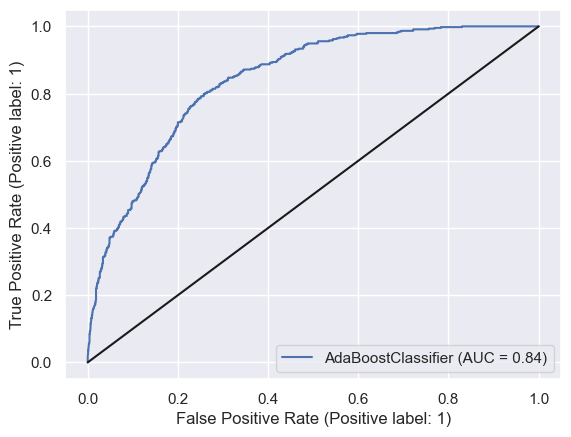

In [544]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=500) 
ada.fit(X_train,y_train)
prediction_ada = ada.predict(X_test)
ada.score(X_test,y_test)
print("Adaboost accuracy: {} ".format(ada.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_ada))
print("")
print(classification_report(y_test,prediction_ada))
print("")
print("Validation Mean F1 Score: ",cross_val_score(ada,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("")
ada_proba = ada.predict_proba(X_test)[:,1]
ada_roc_auc = metrics.roc_auc_score(y_test, ada_proba)
print('ROC_AUC: ', ada_roc_auc)

plot_roc_curve(ada,X_test, y_test)
plt.plot([0,1], [0,1], c='k')

**Recall = 76%**

### Logistic Regression Hyper parameter Tuning

In [545]:
params_lr = {
               'penalty' : ['l1', 'l2', 'elasticnet'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['lbfgs','newton-cg','liblinear'],
               'max_iter' : [100, 1000]
            }

In [546]:
LR = LogisticRegression()

grid_search = GridSearchCV(LR,param_grid=params_lr , scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

grid_search.fit(X_train,y_train)

grid_search.best_estimator_

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


LogisticRegression(C=1.623776739188721)

Logistic Regression accuracy: 0.7815699658703071 

Confusion_matrix:

[[1075  231]
 [ 153  299]]

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1306
           1       0.56      0.66      0.61       452

    accuracy                           0.78      1758
   macro avg       0.72      0.74      0.73      1758
weighted avg       0.80      0.78      0.79      1758


Validation Mean F1 Score:  0.8134984380161615

ROC_AUC:  0.831469629619591


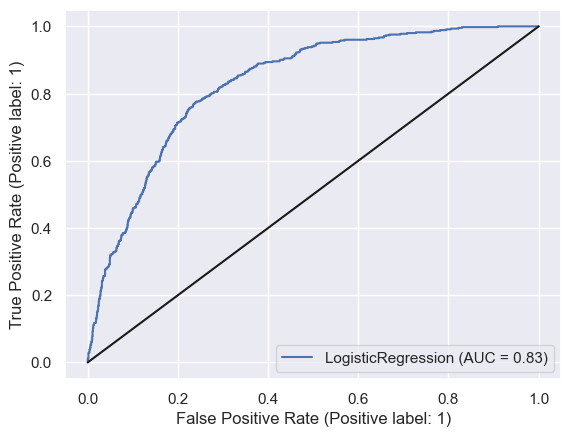

In [555]:
LR = LogisticRegression(C=1.623776739188721, solver='liblinear') 
LR.fit(X_train,y_train)
prediction_LR= LR.predict(X_test)
LR.score(X_test,y_test)
print("Logistic Regression accuracy: {} ".format(LR.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_LR))
print("")
print(classification_report(y_test,prediction_LR))
print("")
print("Validation Mean F1 Score: ",cross_val_score(LR,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("")
LR_proba = LR.predict_proba(X_test)[:,1]
LR_roc_auc = metrics.roc_auc_score(y_test, LR_proba)
print('ROC_AUC: ', LR_roc_auc)

plot_roc_curve(LR,X_test, y_test)
plt.plot([0,1], [0,1], c='k')

### XGBoost:

In [587]:
params_xgb={
 "learning_rate"    : [0.01, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
  "n_estimators"    : [100,200,500,1000],
 "scale_pos_weight" : [1,3,5]
    
}

In [588]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold, StratifiedShuffleSplit
xgb = XGBClassifier()

random_search = RandomizedSearchCV(xgb, param_distributions=params_xgb, n_iter=5, scoring='roc_auc', n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train,y_train)

random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [589]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
              monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, X, y, cv=10)
score.mean()

0.7097564819604293

XGBoost accuracy: 0.6882821387940842 

Confusion_matrix:

[[810 496]
 [ 52 400]]

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      1306
           1       0.45      0.88      0.59       452

    accuracy                           0.69      1758
   macro avg       0.69      0.75      0.67      1758
weighted avg       0.81      0.69      0.71      1758


Validation Mean F1 Score:  0.7731488486629912

ROC_AUC:  0.8304608410467685


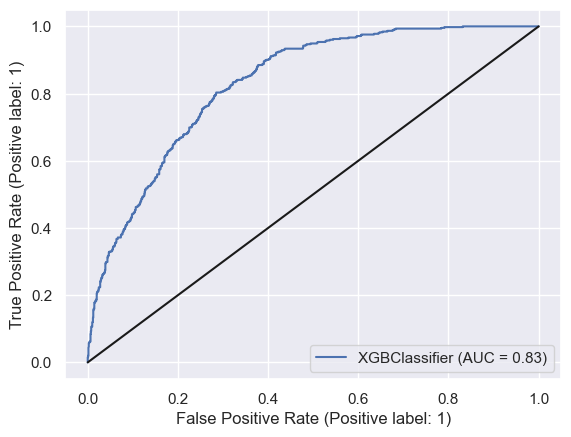

In [590]:
xgb.fit(X_train,y_train)
prediction_xgb = xgb.predict(X_test)
xgb.score(X_test,y_test)
print("XGBoost accuracy: {} ".format(xgb.score(X_test,y_test)))
print("")
print("Confusion_matrix:")
print("")
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction_xgb))
print("")
print(classification_report(y_test,prediction_xgb))
print("")
print("Validation Mean F1 Score: ",cross_val_score(xgb,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("")
xgb_proba = xgb.predict_proba(X_test)[:,1]
xgb_roc_auc = metrics.roc_auc_score(y_test, xgb_proba)
print('ROC_AUC: ', xgb_roc_auc)

plot_roc_curve(xgb,X_test, y_test)
plt.plot([0,1], [0,1], c='k')

## Note- XGBoost after hyper parameter tuning shows +ve class recall of 88%, which is maximum of all the algorithms used.

In [591]:
### Create a Pickle file using serialization, XGBoost model is used.
import pickle
pickle_out = open("xgb.pkl","wb")
pickle.dump(xgb, pickle_out)
pickle_out.close()

In [592]:
### Create a Pickle file using serialization for Standard scaler object.
pickle_out = open("sc.pkl","wb")
pickle.dump(sc, pickle_out)
pickle_out.close()

In [593]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber_optic', 'InternetService_No',
       'PaymentMethod_Credit_card_automatic', 'PaymentMethod_Electronic_check',
       'PaymentMethod_Mailed_check'],
      dtype='object')